<a href="https://colab.research.google.com/github/Laureoby/Air_Quality_dataset/blob/main/Air_Quality_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Air_Quality.csv')
data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN


**Data** **cleaning**

In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB


In [7]:
#First, we delete Message column
data = data.drop(['Unique ID', 'Message'], axis=1)

In [8]:
#I think we can just remove these lines because it's small
data = data.dropna(subset=['Geo Join ID'])
data.isnull().sum()

Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64

In [9]:
#We work on Time Period column
#Define a function to extract the year
def extract_year(time_period):
    if '-' in time_period:
        # This handles ranges by taking the first year
        return time_period.split('-')[0]
    else:
        # This extracts the last four digits which typically represent the year
        return ''.join(filter(str.isdigit, time_period[-4:]))

In [10]:
#Define a function to extract the season
def extract_season(time_period):
    seasons = ['Summer', 'Winter', 'Spring', 'Autumn', 'Annual Average', '2-Year Summer Average']
    for season in seasons:
        if season in time_period:
            return season
    return 'Annual'  # Default if no season is specifically mentioned

In [11]:
#Apply these functions to create new columns
data['Year'] = data['Time Period'].apply(extract_year)
data['Season'] = data['Time Period'].apply(extract_season)

#Now we drop Time Period column
data = data.drop(['Time Period'], axis=1)
data

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Start_Date,Data Value,Year,Season
0,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,01/01/2015,0.3,2015,Annual
1,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,01/01/2015,1.2,2015,Annual
2,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,12/01/2011,8.6,2012,Annual Average
3,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,12/01/2011,8.0,2012,Annual Average
4,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,06/01/2022,6.1,2022,Summer
...,...,...,...,...,...,...,...,...,...,...,...
18020,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),01/01/2019,12.9,2019,Annual
18021,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),01/01/2010,14.7,2010,Annual
18022,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,01/01/2010,43.4,2010,Annual
18023,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,01/01/2010,65.8,2010,Annual


**Data visualization**

As a data analyst, I want to analyze the average boiler emissions and fine particles (PM 2.5) levels across different geographical areas so that I can identify regions with the highest and lowest levels of air pollution. purpose me a code to do that

In [12]:
# Filter the data to include only rows where 'Name' is 'Fine particles (PM 2.5)'
filtered_data = data[data['Name'] == 'Fine particles (PM 2.5)']
#Count values
count_data = filtered_data['Geo Place Name'].value_counts().reset_index()
count_data.columns = ['Geo Place Name', 'Count']
# Displaying the result
filtered_data.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Start_Date,Data Value,Year,Season
2,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,12/01/2011,8.6,2012,Annual Average
3,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,12/01/2011,8.0,2012,Annual Average
4,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,06/01/2022,6.1,2022,Summer
5,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,06/01/2012,10.0,2012,Summer
6,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,06/01/2013,9.8,2013,Summer


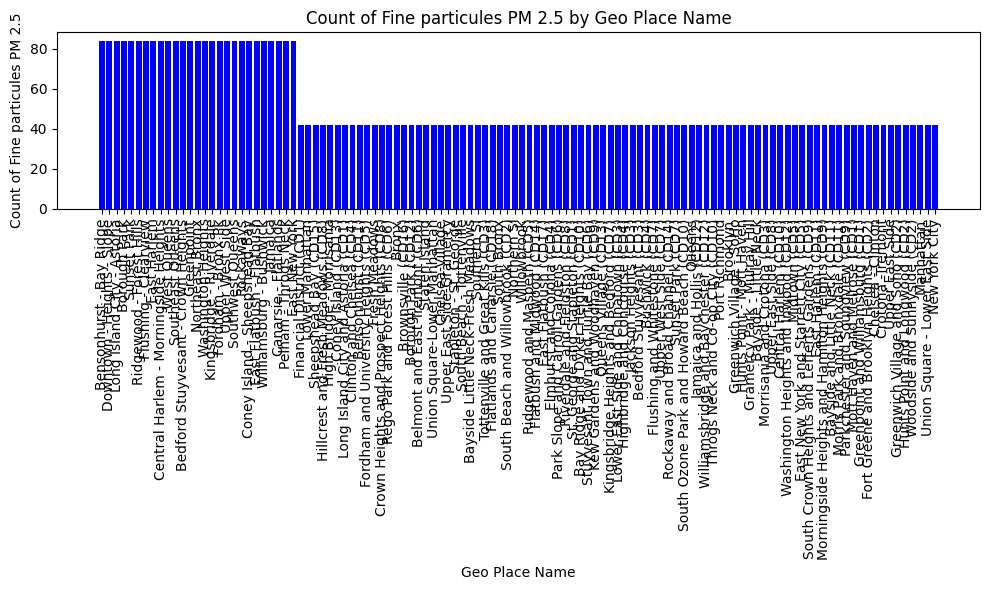

In [13]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(count_data['Geo Place Name'], count_data['Count'], color='blue')
plt.xlabel('Geo Place Name')
plt.ylabel('Count of Fine particules PM 2.5')
plt.title('Count of Fine particules PM 2.5 by Geo Place Name')
plt.xticks(rotation=90)  # Rotates the labels on the x-axis to make them more readable
plt.tight_layout()
plt.show()

As a public health researcher, I want to compare the changes in fine particles (PM 2.5) levels between different time periods in the same geographical location so that I can understand trends in air quality over time.

<ipython-input-19-68fa70fdc3c2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_geo_data['PM2.5'] = filtered_data['Name'].str.extract('(\d+)').astype(float)


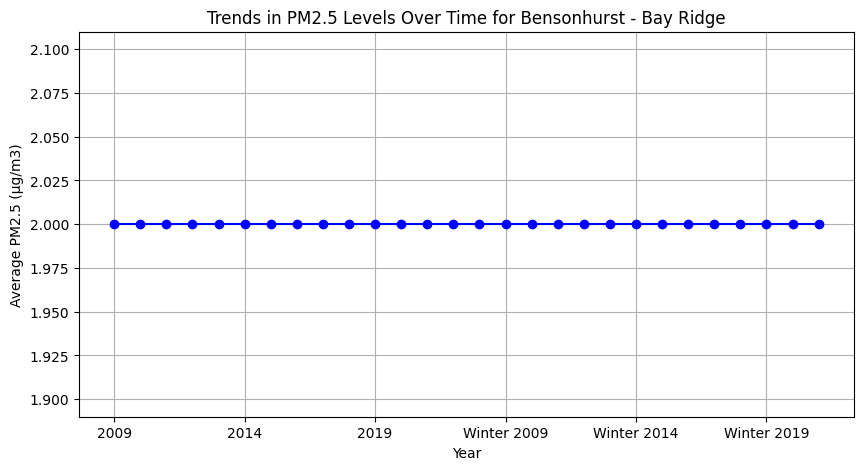

In [19]:
# Specify the location
specific_location = 'Bensonhurst - Bay Ridge'
# Filter data for specific location and PM2.5 values
filtered_geo_data = filtered_data[(filtered_data['Geo Place Name'] == specific_location) & filtered_data['Name']]
# Extract numeric values from 'Name' column
filtered_geo_data['PM2.5'] = filtered_data['Name'].str.extract('(\d+)').astype(float)
# Group by Time Period and calculate mean for PM2.5 values
time_series_data = filtered_geo_data.groupby('Year')['PM2.5'].mean()

# Plotting
plt.figure(figsize=(10, 5))
time_series_data.plot(kind='line', marker='o', color='b')
plt.title(f'Trends in PM2.5 Levels Over Time for {specific_location}')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 (μg/m3)')
plt.grid(True)
plt.show()

As a data scientist, I want to visualize the distribution of boiler emissions and fine particles (PM 2.5) data values to identify any outliers or anomalies that might require further investigation

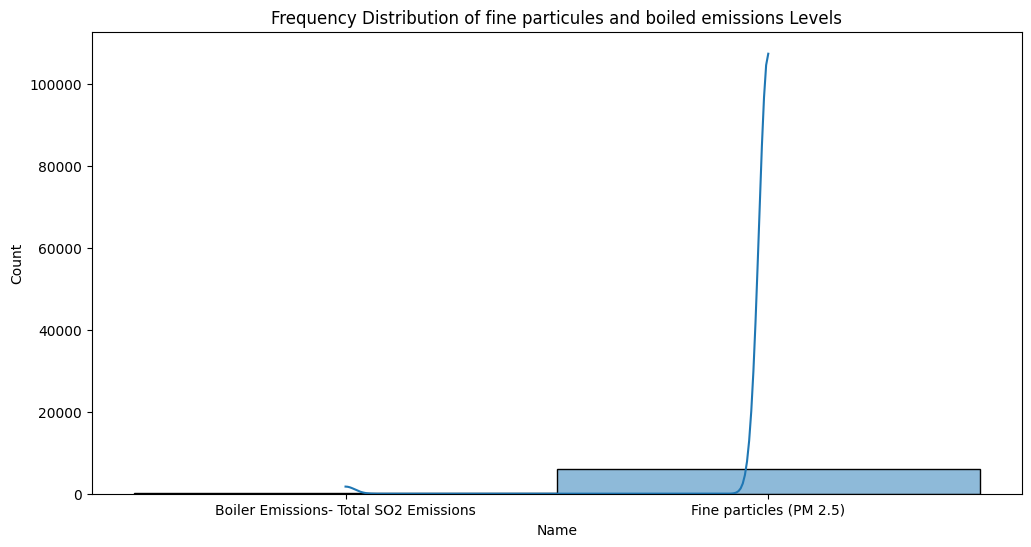

In [18]:
# Filter the data to include only rows where 'Name' is either 'Fine particles (PM 2.5)' or 'Boiler Emissions- Total SO2 Emissions'
filtered_name = data[data['Name'].isin(['Fine particles (PM 2.5)', 'Boiler Emissions- Total SO2 Emissions'])]

#show histogram
plt.figure(figsize=(12, 6))
sns.histplot(filtered_name['Name'], kde=True, bins=30)
plt.title('Frequency Distribution of fine particules and boiled emissions Levels')
plt.show()

As a city planner, I want to map the data to visualize air pollution levels in different neighborhoods over the years so that I can identify areas that need targeted interventions for air quality improvement

In [17]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [20]:
geolocator = Nominatim(user_agent="obyApp")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)  # 1 second delay between requests

In [ ]:
def get_location(row):
    try:
        location = geocode(row['Geo Place Name'])
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

# Apply the function and create the new columns
data[['latitude', 'longitude']] = data.apply(get_location, axis=1)

In [ ]:
data.to_csv('updated_data.csv', index=False)

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.longitude, data.latitude)
)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='Data Value', ax=ax, legend=True,
         legend_kwds={'label': "Level of Pollution"},
         cmap='viridis')  # Use an appropriate colormap
plt.title('Air Pollution Levels by Neighborhood Over Years')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(gdf,
                        lat='latitude',
                        lon='longitude',
                        color='Data Value',
                        size='Data Value',
                        hover_name='neighborhood',
                        hover_data=['Time Period', 'Data Value'],
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=10,
                        mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

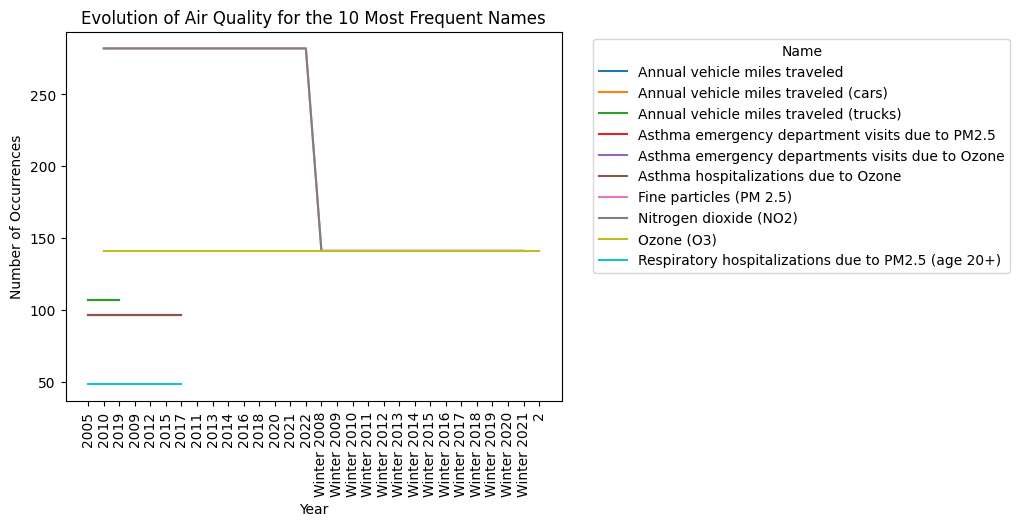

In [24]:
# Get the top 10 most frequent names
top_names = data['Name'].value_counts().head(10).index

# Group by 'Name' and 'Year' and count occurrences
yearly_name_ratings = data.groupby(['Name', 'Year']).size().reset_index(name='Counts')

# Filter data to include only the top names
filtered_yearly_name_ratings = yearly_name_ratings[yearly_name_ratings['Name'].isin(top_names)]

# Create a line plot
sns.lineplot(data=filtered_yearly_name_ratings, x='Year', y='Counts', hue='Name', palette='tab10')

# Add legend and title
plt.title("Evolution of Air Quality for the 10 Most Frequent Names")
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=90)
plt.legend(title='Name', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside
plt.show()
